#Part 1 - Bank Dataset

In [2]:
import pandas as pd

###Problem 1: Load the bank dataset

In [3]:
bank_df = pd.read_csv("bank.csv")
bank_df.head()

,age,job,marital,balance,duration,y
0,56,technician,divorced,-934,595,no
1,69,management,divorced,2380,915,no
2,46,services,married,444,288,no
3,32,admin,single,2107,685,no
4,60,technician,married,3726,500,no


###Problem 1.2 Inspect the DataFrame


In [9]:
print("DataFrame Info")
bank_df.info()

DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   job       200 non-null    object
 2   marital   200 non-null    object
 3   balance   200 non-null    int64 
 4   duration  200 non-null    int64 
 5   y         200 non-null    object
dtypes: int64(3), object(3)
memory usage: 9.5+ KB


### (a) columns with dtype = object


In [6]:
obj_cols = bank_df.select_dtypes(include="object").columns
print("\nObject type columns")
print(list(obj_cols))


=== Object type columns ===
['job', 'marital', 'y']


### (b) unique values for each object column


In [10]:
for col in obj_cols:
    print(f"\nUnique values in column '{col}':")
    print(bank_df[col].unique())


Unique values in column 'job':
['technician' 'management' 'services' 'admin']

Unique values in column 'marital':
['divorced' 'married' 'single']

Unique values in column 'y':
['no' 'yes']


### (c) total number of null values in each column


In [11]:
print("\nNull values per column")
print(bank_df.isnull().sum())


Null values per column
age         0
job         0
marital     0
balance     0
duration    0
y           0
dtype: int64


###Problem 1.3: Drop object columns


In [12]:
bank_numeric_df = bank_df.drop(columns=obj_cols)

print("=== Numeric-only DataFrame (first 5 rows) ===")
print(bank_numeric_df.head())

#Save numeric dataframe to a new csv fileData
bank_numeric_df.to_csv("banknumericdata.csv", index=False)
print("\nSaved numeric data to 'banknumericdata.csv'")


=== Numeric-only DataFrame (first 5 rows) ===
   age  balance  duration
0   56     -934       595
1   69     2380       915
2   46      444       288
3   32     2107       685
4   60     3726       500

Saved numeric data to 'banknumericdata.csv'


###Problem 1.4: Read the new CSV and show statistics


In [13]:
bank_numeric_loaded = pd.read_csv("banknumericdata.csv")

print("=== Loaded numeric data info ===")
bank_numeric_loaded.info()

print("\n=== Summary statistics of numeric data ===")
print(bank_numeric_loaded.describe())


=== Loaded numeric data info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       200 non-null    int64
 1   balance   200 non-null    int64
 2   duration  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB

=== Summary statistics of numeric data ===
             age      balance    duration
count  200.00000   200.000000  200.000000
mean    43.42500  1410.375000  521.280000
std     14.94191  1922.796739  294.560948
min     18.00000 -1886.000000   30.000000
25%     31.00000  -388.500000  256.750000
50%     43.50000  1360.500000  507.500000
75%     56.00000  3080.750000  793.750000
max     69.00000  4938.000000  997.000000


#Part 2 - Medical Students Dataset

In [14]:
import pandas as pd

medical_df = pd.read_csv("medical_students_dataset.csv")
medical_df.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


###Identifing columns with missing (null) values

In [16]:
#checking full info
medical_df.info()

#counting missing values per column
print("\nMissing values in each column")
print(medical_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB

Missing values in each column
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            2

###Filling missing values (imputation)

In [21]:
medical_df.columns

Index(['Student ID', 'Age', 'Gender', 'Height', 'Weight', 'Blood Type', 'BMI',
       'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol',
       'Diabetes', 'Smoking'],
      dtype='object')

In [22]:
#-----------------------------
# IMPUTATION FOR NUMERIC COLUMNS
#-----------------------------

numeric_cols = ['Age', 'Height', 'Weight', 'BMI', 'Temperature',
                'Heart Rate', 'Blood Pressure', 'Cholesterol']

#Fill numeric columns with their median
for col in numeric_cols:
    if col in medical_df.columns:
        medical_df[col] = medical_df[col].fillna(medical_df[col].median())


#-----------------------------
#IMPUTATION FOR CATEGORICAL COLUMNS
#-----------------------------

categorical_cols = ['Gender', 'Blood Type', 'Diabetes', 'Smoking']

for col in categorical_cols:
    if col in medical_df.columns:
        medical_df[col] = medical_df[col].fillna(medical_df[col].mode()[0])


#-----------------------------
#CHECK UPDATED MISSING VALUES
#-----------------------------
print("\nMissing values per column AFTER imputation:")
print(medical_df.isnull().sum())


#-----------------------------
#REMOVE DUPLICATES
#-----------------------------
print("\nDuplicate rows before cleaning:", medical_df.duplicated().sum())

medical_df_cleaned = medical_df.drop_duplicates()

print("Duplicate rows after cleaning:", medical_df_cleaned.duplicated().sum())

medical_df_cleaned.head()


Missing values per column AFTER imputation:
Student ID        20000
Age                   0
Gender                0
Height                0
Weight                0
Blood Type            0
BMI                   0
Temperature           0
Heart Rate            0
Blood Pressure        0
Cholesterol           0
Diabetes              0
Smoking               0
dtype: int64

Duplicate rows before cleaning: 12879
Duplicate rows after cleaning: 0


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,98.599654,95.0,109.0,203.0,No,No
1,2.0,26.0,Male,152.069157,47.630941,B,22.671401,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,174.899914,46.234173,O,22.671401,98.480008,95.0,115.0,231.0,No,No


#Titanic problem 1

In [24]:
import pandas as pd

titanic_df = pd.read_csv("Titanic-Dataset.csv")
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###Creating the subset datafrme

In [25]:
subset_cols = ['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']

titanic_subset = titanic_df[subset_cols]
titanic_subset.head()

,Name,Pclass,Sex,Age,Fare,Survived
0,"Braund, Mr. Owen Harris",3,male,22.0,7.2500,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
2,"Heikkinen, Miss. Laina",3,female,26.0,7.9250,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
4,"Allen, Mr. William Henry",3,male,35.0,8.0500,0


###Keeping only first-class passengers

In [26]:
titanic_first_class = titanic_subset[titanic_subset['Pclass'] == 1]
titanic_first_class.head()

,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1


###Calculating required statistics for fare

In [27]:
mean_fare = titanic_first_class['Fare'].mean()
median_fare = titanic_first_class['Fare'].median()
max_fare = titanic_first_class['Fare'].max()
min_fare = titanic_first_class['Fare'].min()

print("=== First Class Fare Statistics ===")
print("Mean Fare:", mean_fare)
print("Median Fare:", median_fare)
print("Maximum Fare:", max_fare)
print("Minimum Fare:", min_fare)


=== First Class Fare Statistics ===
Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


#Titanic problem 2

###Counting missing values

In [29]:
missing_age = titanic_subset['Age'].isnull().sum()
print("Number of missing Age values:", missing_age)

Number of missing Age values: 177


###Dropping rows where age is null

In [30]:
titanic_age_cleaned = titanic_subset.dropna(subset=['Age'])

titanic_age_cleaned.head()

,Name,Pclass,Sex,Age,Fare,Survived
0,"Braund, Mr. Owen Harris",3,male,22.0,7.2500,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
2,"Heikkinen, Miss. Laina",3,female,26.0,7.9250,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
4,"Allen, Mr. William Henry",3,male,35.0,8.0500,0


###Checking new missing count

In [31]:
print("Missing Age values AFTER dropping:", titanic_age_cleaned['Age'].isnull().sum())

Missing Age values AFTER dropping: 0


###Encoding the embarked column

In [32]:
embarked_dummies = pd.get_dummies(titanic_df["Embarked"], prefix="Embarked")

###Adding new columns

In [33]:
titanic_encoded = pd.concat([titanic_df, embarked_dummies], axis=1)

###Dropping the original embarked column

In [34]:
titanic_encoded.drop(columns=["Embarked"], inplace=True)

In [35]:
titanic_encoded.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


#Titanic problem 4

###Mean survival rates by gender

In [36]:
survival_by_gender = titanic_df.groupby("Sex")["Survived"].mean()

print("=== Mean Survival Rate by Gender ===")
print(survival_by_gender)


=== Mean Survival Rate by Gender ===
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


###Visualization

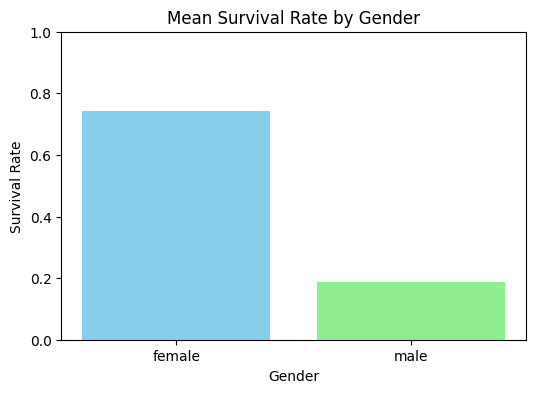

In [38]:
import matplotlib.pyplot as plt

survival_by_gender = titanic_df.groupby("Sex")["Survived"].mean()

plt.figure(figsize=(6,4))
plt.bar(survival_by_gender.index, survival_by_gender.values, color=['skyblue', 'lightgreen'])
plt.title("Mean Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.ylim(0,1)
plt.show()

#Titanic problem 5

#Mean

In [39]:
survival_by_embarked = titanic_df.groupby("Embarked")["Survived"].mean()
print(survival_by_embarked)

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


###Visualization

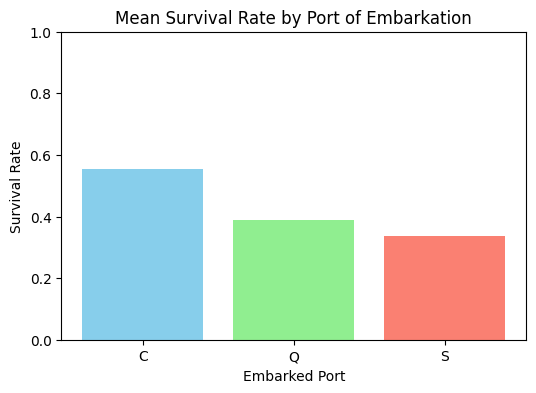

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(survival_by_embarked.index, survival_by_embarked.values,
        color=['skyblue', 'lightgreen', 'salmon'])

plt.title("Mean Survival Rate by Port of Embarkation")
plt.xlabel("Embarked Port")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)

plt.show()
